In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


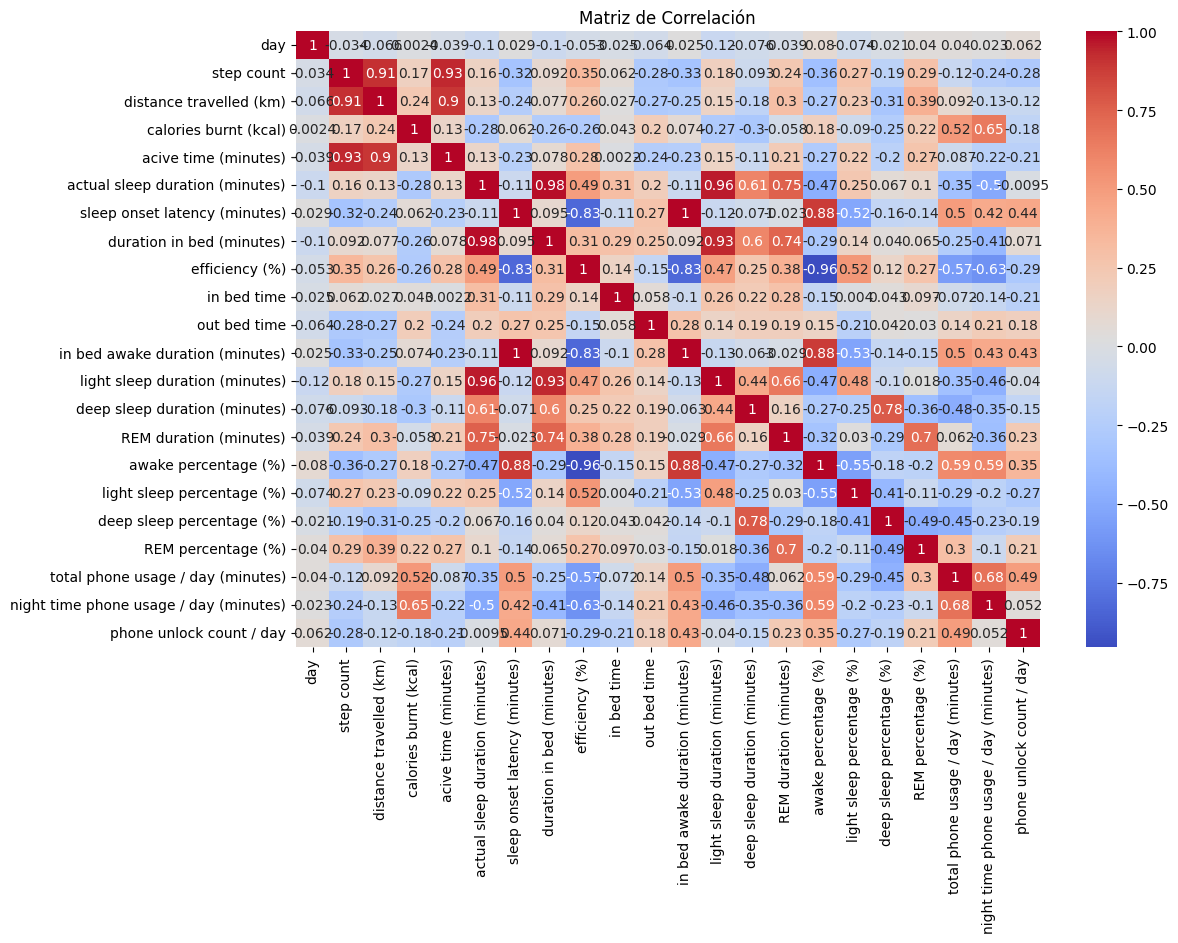

Característica 1: 60.839091562071616
Característica 2: 122.22811544153964


In [16]:
#DATASET LOADING
#ESTE ES EL DATASET SIN MODIFICAR
df = pd.read_csv("B.HEALTH_classification.csv")

# Preparar los datos
new_df_regression = df.drop(['subject','label'], axis=1)
new_X = new_df_regression.drop('calories burnt (kcal)', axis=1)
new_Y = new_df_regression['calories burnt (kcal)']

# Filas con valores nulos
new_X = new_X.dropna()
new_Y = new_Y[new_X.index]

# Calcular la correlación
correlation_matrix = new_df_regression.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Seleccionar las variables más correlacionadas con la variable objetivo
correlation_threshold = 0.5
correlated_features = correlation_matrix.index[abs(correlation_matrix['calories burnt (kcal)']) > correlation_threshold].tolist()
correlated_features.remove('calories burnt (kcal)')
new_X = new_X[correlated_features]

# Normalizar los datos
scaler = StandardScaler()
new_X = scaler.fit_transform(new_X)

# Selección de características
selector = SelectKBest(score_func=f_regression, k='all')
new_X_selected = selector.fit_transform(new_X, new_Y)

# Mostrar las puntuaciones de las características
scores = selector.scores_
for i in range(len(scores)):
    print(f"Característica {i+1}: {scores[i]}")

Linear Regression:
  Mean Squared Error: 268009.7415876429
  Mean Absolute Error: 396.4151718117256
  R² Score: -12.19059434862466
  Root Mean Squared Error: 517.6965728954007



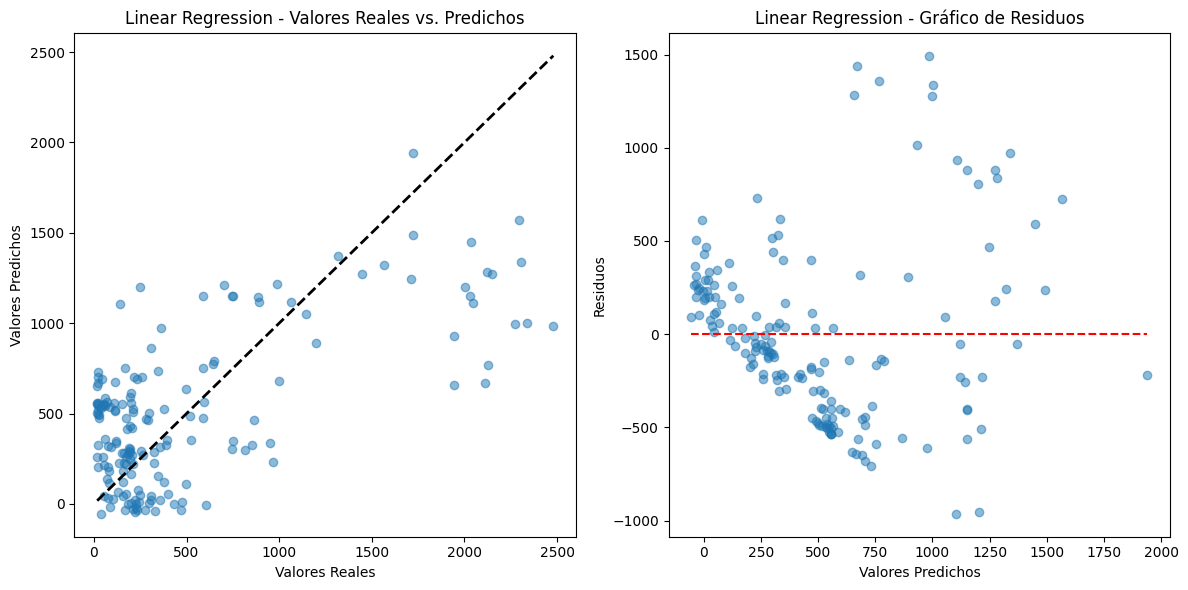

In [17]:
# Modelo de regresión lineal
model = LinearRegression()

# Evaluar el modelo con validación cruzada
scores = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_squared_error')
mse = -scores.mean()
mae = -cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='r2').mean()
rmse = np.sqrt(mse)

print(f"Linear Regression:")
print(f"  Mean Squared Error: {mse}")
print(f"  Mean Absolute Error: {mae}")
print(f"  R² Score: {r2}")
print(f"  Root Mean Squared Error: {rmse}")
print()

# Ajustar el modelo y predecir
model.fit(new_X_selected, new_Y)
new_Y_pred = model.predict(new_X_selected)

# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de valores reales vs. predichos
plt.subplot(1, 2, 1)
plt.scatter(new_Y, new_Y_pred, alpha=0.5)
plt.plot([new_Y.min(), new_Y.max()], [new_Y.min(), new_Y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Linear Regression - Valores Reales vs. Predichos')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals = new_Y - new_Y_pred
plt.scatter(new_Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=new_Y_pred.min(), xmax=new_Y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Linear Regression - Gráfico de Residuos')

plt.tight_layout()
plt.show()

Decision Tree:
  Mean Squared Error: 187631.1596048791
  Mean Absolute Error: 264.8973668267779
  R² Score: -0.40517122774436365
  Root Mean Squared Error: 433.1641254823385



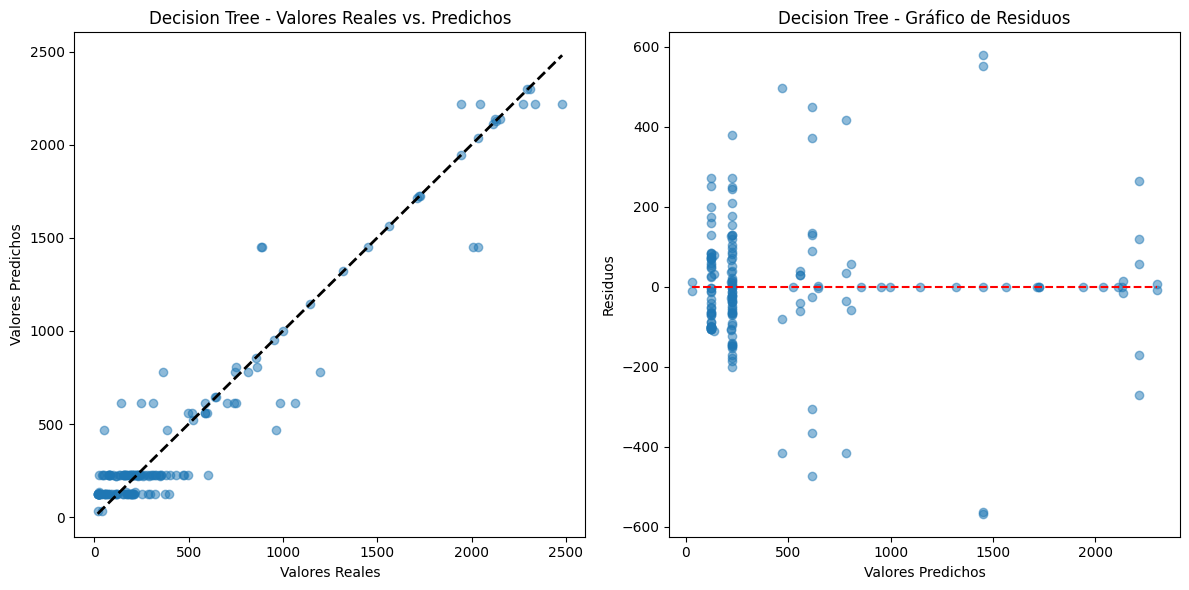

In [18]:
# Modelo de árbol de decisión
model = DecisionTreeRegressor(max_depth=5)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_squared_error')
mse = -scores.mean()
mae = -cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='r2').mean()
rmse = np.sqrt(mse)

print(f"Decision Tree:")
print(f"  Mean Squared Error: {mse}")
print(f"  Mean Absolute Error: {mae}")
print(f"  R² Score: {r2}")
print(f"  Root Mean Squared Error: {rmse}")
print()

# Ajustar el modelo y predecir
model.fit(new_X_selected, new_Y)
new_Y_pred = model.predict(new_X_selected)

# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de valores reales vs. predichos
plt.subplot(1, 2, 1)
plt.scatter(new_Y, new_Y_pred, alpha=0.5)
plt.plot([new_Y.min(), new_Y.max()], [new_Y.min(), new_Y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Decision Tree - Valores Reales vs. Predichos')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals = new_Y - new_Y_pred
plt.scatter(new_Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=new_Y_pred.min(), xmax=new_Y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Decision Tree - Gráfico de Residuos')

plt.tight_layout()
plt.show()

Random Forest:
  Mean Squared Error: 188732.939816119
  Mean Absolute Error: 253.31869366088335
  R² Score: -2.967755808864093
  Root Mean Squared Error: 434.43404541554867



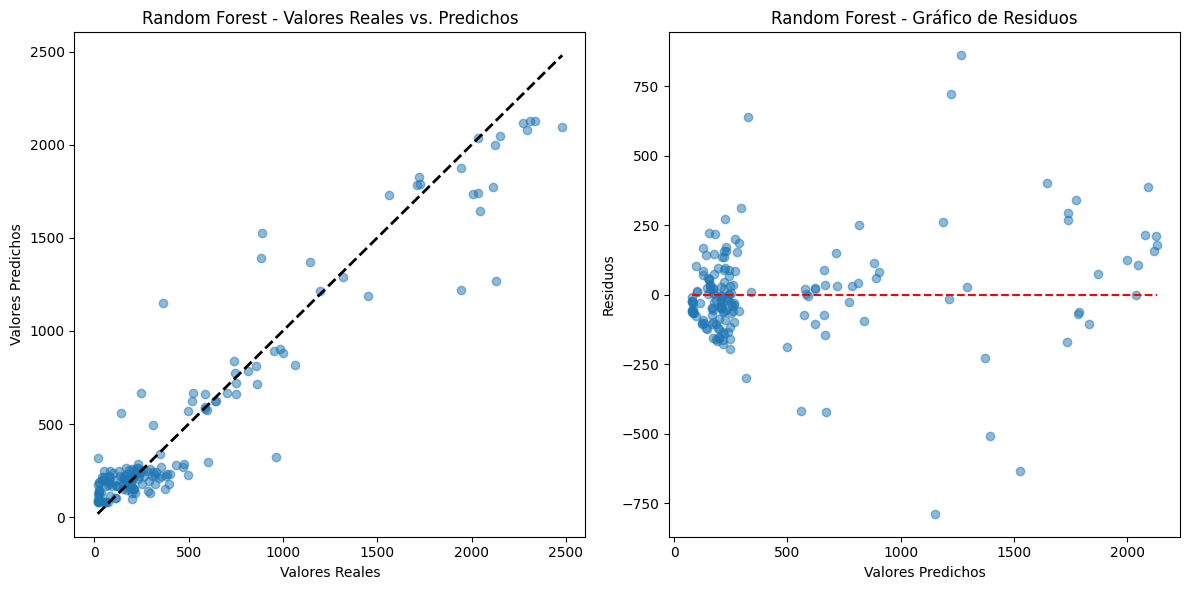

In [19]:
# Modelo de bosque aleatorio
model = RandomForestRegressor(n_estimators=50, max_depth=5)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_squared_error')
mse = -scores.mean()
mae = -cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='r2').mean()
rmse = np.sqrt(mse)

print(f"Random Forest:")
print(f"  Mean Squared Error: {mse}")
print(f"  Mean Absolute Error: {mae}")
print(f"  R² Score: {r2}")
print(f"  Root Mean Squared Error: {rmse}")
print()

# Ajustar el modelo y predecir
model.fit(new_X_selected, new_Y)
new_Y_pred = model.predict(new_X_selected)

# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de valores reales vs. predichos
plt.subplot(1, 2, 1)
plt.scatter(new_Y, new_Y_pred, alpha=0.5)
plt.plot([new_Y.min(), new_Y.max()], [new_Y.min(), new_Y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Random Forest - Valores Reales vs. Predichos')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals = new_Y - new_Y_pred
plt.scatter(new_Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=new_Y_pred.min(), xmax=new_Y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Random Forest - Gráfico de Residuos')

plt.tight_layout()
plt.show()

Gradient Boosting:
  Mean Squared Error: 220782.62033236172
  Mean Absolute Error: 278.94157880270683
  R² Score: -5.292493908537912
  Root Mean Squared Error: 469.87511142043024



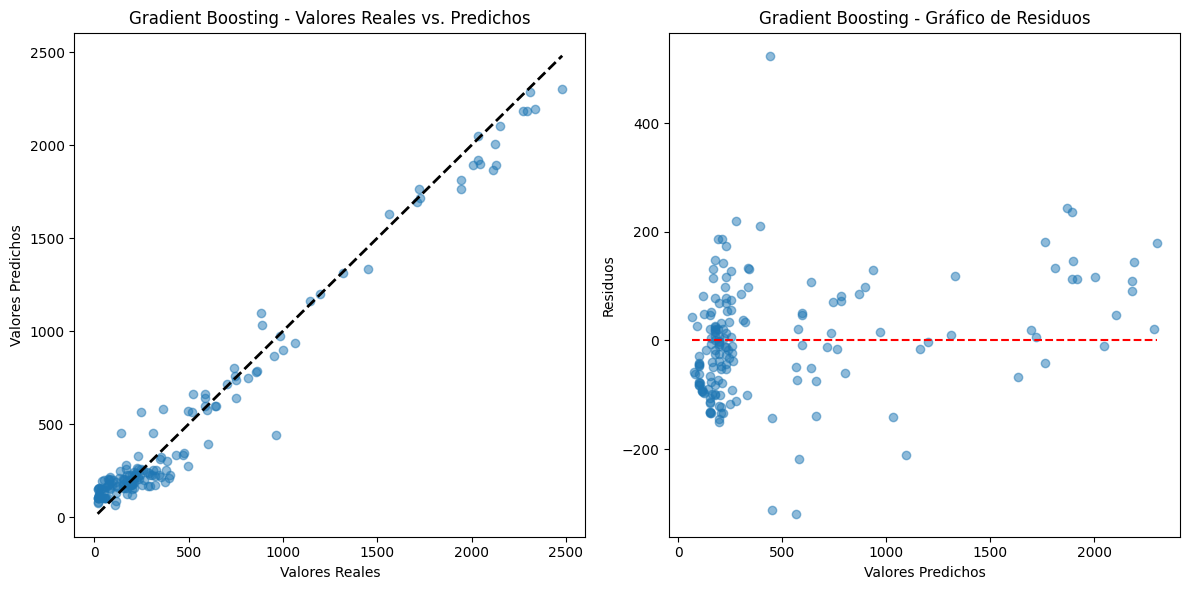

In [20]:
# Modelo de Gradient Boosting
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_squared_error')
mse = -scores.mean()
mae = -cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='r2').mean()
rmse = np.sqrt(mse)

print(f"Gradient Boosting:")
print(f"  Mean Squared Error: {mse}")
print(f"  Mean Absolute Error: {mae}")
print(f"  R² Score: {r2}")
print(f"  Root Mean Squared Error: {rmse}")
print()

# Ajustar el modelo y predecir
model.fit(new_X_selected, new_Y)
new_Y_pred = model.predict(new_X_selected)

# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de valores reales vs. predichos
plt.subplot(1, 2, 1)
plt.scatter(new_Y, new_Y_pred, alpha=0.5)
plt.plot([new_Y.min(), new_Y.max()], [new_Y.min(), new_Y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Gradient Boosting - Valores Reales vs. Predichos')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals = new_Y - new_Y_pred
plt.scatter(new_Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=new_Y_pred.min(), xmax=new_Y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Gradient Boosting - Gráfico de Residuos')

plt.tight_layout()
plt.show()

Support Vector Regression:
  Mean Squared Error: 437900.72180051205
  Mean Absolute Error: 399.2643559341683
  R² Score: -4.293747754352872
  Root Mean Squared Error: 661.7406756430438



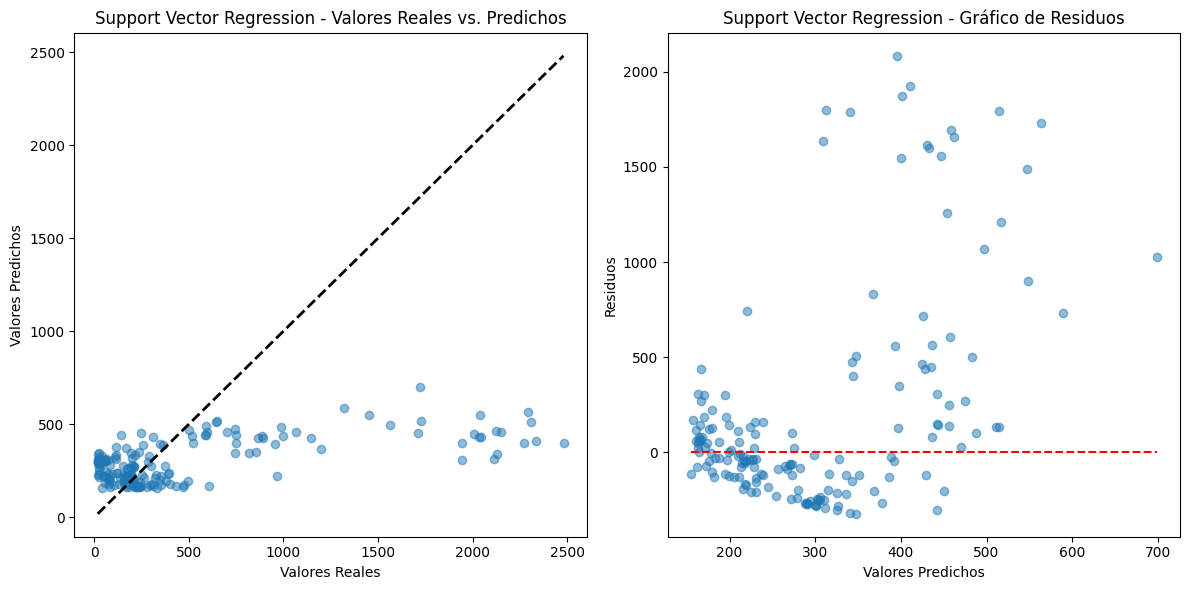

In [21]:
# Modelo de Support Vector Regression
model = SVR(C=100, gamma=0.01)

# Evaluar el modelo con validación cruzada
scores = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_squared_error')
mse = -scores.mean()
mae = -cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='neg_mean_absolute_error').mean()
r2 = cross_val_score(model, new_X_selected, new_Y, cv=5, scoring='r2').mean()
rmse = np.sqrt(mse)

print(f"Support Vector Regression:")
print(f"  Mean Squared Error: {mse}")
print(f"  Mean Absolute Error: {mae}")
print(f"  R² Score: {r2}")
print(f"  Root Mean Squared Error: {rmse}")
print()

# Ajustar el modelo y predecir
model.fit(new_X_selected, new_Y)
new_Y_pred = model.predict(new_X_selected)

# Graficar resultados
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de valores reales vs. predichos
plt.subplot(1, 2, 1)
plt.scatter(new_Y, new_Y_pred, alpha=0.5)
plt.plot([new_Y.min(), new_Y.max()], [new_Y.min(), new_Y.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Support Vector Regression - Valores Reales vs. Predichos')

# Gráfico de residuos
plt.subplot(1, 2, 2)
residuals = new_Y - new_Y_pred
plt.scatter(new_Y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=new_Y_pred.min(), xmax=new_Y_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Valores Predichos')
plt.ylabel('Residuos')
plt.title('Support Vector Regression - Gráfico de Residuos')

plt.tight_layout()
plt.show()